<a href="https://colab.research.google.com/github/ManullangJihan/100-Day-ML-Challenge/blob/main/06_Indian_Liver_Record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Liver Patient Records

## Context

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.
Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

## Content
1. Age of the patient
2. Gender of the patient
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase
7. Aspartate Aminotransferase
8. Total Protiens
9. Albumin
10. Albumin and Globulin Ratio
11. Dataset (Target, patient has liver disease or not)

[Sumber Data](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records)

In [ ]:
!pip install interpret
!pip install scikit-optimize

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
import plotly.io as pio

pio.templates[pio.templates.default] = 'plotly_dark'
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams.update({'font.size': 12})

In [ ]:
path = "/content/drive/MyDrive/Indian_Liver/indian_liver_patient.csv"
main_df = pd.read_csv(path)

n_samples, n_features = main_df.shape
print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}\n')

main_df.head()

Number of samples: 583
Number of features: 11



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
main_df.isna().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
print(main_df['Albumin_and_Globulin_Ratio'].isna().sum())

4


In [ ]:
main_df.dropna(inplace=True)

In [ ]:
main_df.isna().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [ ]:
main_df['Gender'] = main_df['Gender'].map({'Male': 1, 'Female': 0})
main_df['Dataset'] = main_df['Dataset'].map({1: 1, 2: 0})

main_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
X = main_df.drop('Dataset', axis=1)
y = main_df['Dataset']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# We Will Evaluate the Dataset that has been Feature-engineering 
def evaluate(mat_decomp_method):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2)
    transformer = mat_decomp_method.fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)

    clf = LogisticRegression(max_iter=1e6).fit(X_train, y_train)

    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)

    print(f'Accuracy on training set: {acc_train}')
    print(f'Accuracy on test set: {acc_test}')

In [ ]:
# DictionaryLearning
from sklearn.decomposition import DictionaryLearning

dict_learner = DictionaryLearning(
    n_components = 7,
    alpha = 0.1,
    max_iter = 1000,
    random_state = 42)

evaluate(dict_learner)

In [ ]:
# FactorAnalysis
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(
    n_components = 7,
    random_state = 42,
    rotation = None,
)

evaluate(transformer)

Accuracy on training set: 0.7278617710583153
Accuracy on test set: 0.7241379310344828


In [ ]:
# TruncateSVD
from sklearn.decomposition import TruncatedSVD
transformer = TruncatedSVD(
    n_components = 7,
    n_iter = 7,
    random_state = 42
)

evaluate(transformer)

Accuracy on training set: 0.7365010799136069
Accuracy on test set: 0.7327586206896551


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2
)

clf = LogisticRegression(max_iter=1e6)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(acc)

0.7327586206896551


In [ ]:
# FactorAnalysis
from sklearn.decomposition import FactorAnalysis

fa_transformer = FactorAnalysis(
    n_components = 7,
    random_state = 42,
    rotation = None,)

# PCA
from sklearn.decomposition import PCA

pca_transformer = PCA(
    n_components = 7,)


# TruncateSVD
from sklearn.decomposition import TruncatedSVD
svd_transformer = TruncatedSVD(
    n_components = 7,
    random_state = 42)

mat_decomps = [dict_learner, fa_transformer, pca_transformer, svd_transformer]

best_acc = 0
for mat_decomp in mat_decomps:
    acc = evaluate(mat_decomp, X, y)
    name = type(mat_decomp).__name__
    print(f'Accuracy LR fitted with Matrix transformed by {name}: {acc:.3f}')
    if acc >= best_acc:
        X = mat_decomp.fit_transfrom(X)

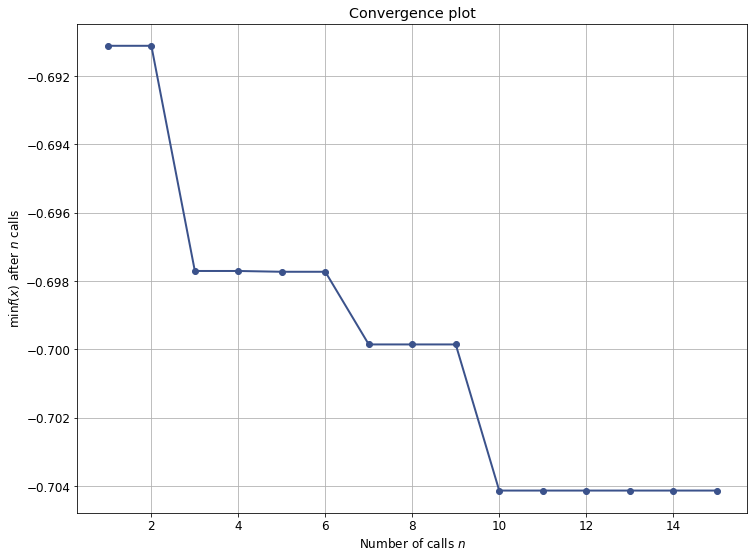

In [ ]:
from skopt import gp_minimize, space
from skopt.utils import use_named_args
from skopt.callbacks import CheckpointSaver
from skopt.plots import plot_convergence
from sklearn.model_selection import cross_val_score
from interpret.glassbox import ExplainableBoostingClassifier

def hypertune(model, param_grid, param_names, x, y):
    
    clf = model
    X_train, X_test, y_train, y_test =  train_test_split(
        x, y, test_size=0.2,
    )

    @use_named_args(param_grid)
    def optimize(**params):
        model = clf.set_params(**params)
        acc = cross_val_score(
            model, X_train, y_train, scoring='accuracy', cv=5
        )

        return -1.0 * np.mean(acc)
    
    res = gp_minimize(
        optimize,
        dimensions = param_grid,
        n_calls = 15,)
    
    plot_convergence(res)
    
    best_params = dict(zip(param_names, res.x))
    clf = clf.set_params(**best_params)
    clf.fit(X_train, y_train)

    return clf

X = main_df.drop('Dataset', axis=1)
y = main_df['Dataset']

clf = ExplainableBoostingClassifier(
    outer_bags = 8,
    inner_bags = 0,
    min_samples_leaf = 2)

param_grid = [space.Integer(8, 15, name='outer_bags'),
              space.Integer(0, 5, name='inner_bags'),
              space.Integer(2, 10, name='min_samples_leaf')]
param_names = ['outer_bags', 'inner_bags', 'min_samples_leaf']

clf = hypertune(clf, param_grid, param_names, X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.4, random_state=42
)

score = clf.score(X_test, y_test)
print(f'Accuracy score: {score:.4f}')

Accuracy score: 0.7457


In [ ]:
from interpret import show

ebm_global = clf.explain_global()
show(ebm_global)

/usr/local/lib/python3.7/dist-packages/interpret/provider/visualize.py:44: UserWarning:

Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.



Terdapat beberapa poin penting yang kita dapatkan dari pemodelan EBM:
## Hal yang meningkatkan resiko penyakit liver:
1. Umur yang semakin menua (diatas 38)
2. Laki-laki 
3. Total Bilirubin yang tinggi (diatas 1.65)
4. Direct Bilirubin yang tinggi (diatas 0.75)
5. Alkaline Phoshotase yang tinggi (diatas 211)
6. Alamine Aminotransferase yang  tinggi (diatas 62.5)
7. Aspartate Aminotransferase (diatas 43.5)
8. Protein dengan nilai diatas 8
9. Albumin dengan nilai beresiko direntang 1 dan 3, dan dilanjutkan dengan nilai diatas 4.6. Dengan kata lain nilai Albumin direntang 3 dan 4.6 tergolong rendah resiko liver
10. Rasio Albumin dan Globulin direntang 0.3 sampai 0.8, dan nilai diatas 1.76 termasuk yang meningkatkan resiko penyakit liver

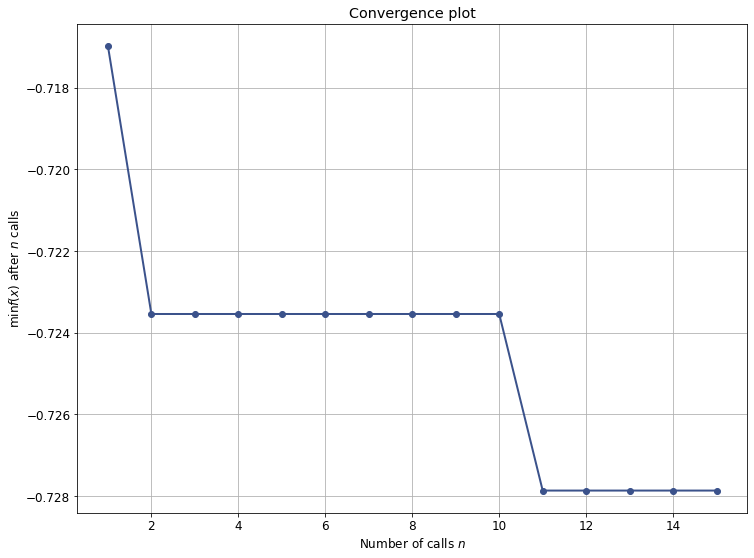

In [ ]:
from xgboost import XGBClassifier

X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

param_grid = [space.Integer(100, 1500, name='n_estimators'),
              space.Integer(5, 16, name='max_depth'),
              space.Real(0.0, 1.0, name='subsample'),
              space.Real(0.1, 1.0, name='eta')]

param_names = ['n_estimators', 'max_depth', 'subsample', 'eta']
xgb_clf = XGBClassifier()
hypertune_xgb = hypertune(xgb_clf, param_grid, param_names, X, y)